NOTE: run from root directory, not models directory

In [1]:
import pandas as pd
pd.set_option('display.max_columns', None)

Fetch data from DB:

In [2]:
from data import StatcastData

statcast_data = StatcastData()
display(statcast_data.at_bats_df)
statcast_data.batter_games_df

,game_pk,at_bat,batter,pitcher,home,rhb,rhp,xBA,H,BIP,game_date,starter
0,413661,1,572761,452657,False,False,False,NaN,False,True,2015-04-05,True
1,413661,2,518792,452657,False,False,False,NaN,True,True,2015-04-05,True
2,413661,3,407812,452657,False,True,False,NaN,True,True,2015-04-05,True
3,413661,4,425509,452657,False,True,False,NaN,False,False,2015-04-05,True
4,413661,5,571431,452657,False,False,False,NaN,False,False,2015-04-05,True
...,...,...,...,...,...,...,...,...,...,...,...,...
1478832,717097,56,687952,595345,True,True,False,0.014,False,True,2023-08-07,False
1478833,717097,62,458015,656945,True,False,False,0.083,False,True,2023-08-07,False
1478834,717097,63,663886,656945,True,True,False,NaN,False,False,2023-08-07,False
1478835,717097,64,621028,656945,True,True,False,NaN,False,False,2023-08-07,False


,game_pk,home,batter,PA,xH,H,BIP,HG,xHG,game_date,year,lineup,hp_to_1b,bats,team,opponent,opp_starter
0,413661,False,572761,5,1.767,2,5,True,True,2015-04-05,2015,1.0,4.28,L,STL,CHC,425794
1,413661,False,518792,5,1.666,3,5,True,True,2015-04-05,2015,2.0,4.36,L,STL,CHC,425794
2,413661,False,407812,5,0.653,2,3,True,False,2015-04-05,2015,3.0,4.54,R,STL,CHC,425794
3,413661,False,425509,5,0.540,1,3,True,False,2015-04-05,2015,4.0,4.75,R,STL,CHC,425794
4,413661,False,571431,4,0.107,0,2,False,False,2015-04-05,2015,5.0,4.71,L,STL,CHC,425794
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
408635,717097,True,663886,4,0.000,0,1,False,False,2023-08-07,2023,6.0,4.62,R,CIN,MIA,682227
408636,717097,True,621028,4,1.249,1,2,True,True,2023-08-07,2023,7.0,4.42,R,CIN,MIA,682227
408637,717097,True,666181,3,0.000,0,0,False,False,2023-08-07,2023,8.0,4.37,L,CIN,MIA,682227
408638,717097,True,656413,3,0.717,0,1,False,False,2023-08-07,2023,9.0,4.27,R,CIN,MIA,682227


Construct Features:

In [13]:
from data import GameDay

game_days, _ = list(), print('Gameday:')
for game_datetime in statcast_data.batter_games_df['game_date'].unique():
    print(game_datetime.strftime('%Y-%m-%d'), end = '\r', flush = True)
    game_days.append(GameDay(game_date = game_datetime.date(), statcast_data = statcast_data))
df = pd.concat([game_day.todays_batters_df for game_day in game_days], ignore_index = True)
df

,game_pk,PA,xH,H,BIP,HG,xHG,game_date,year,lineup,hp_to_1b,bats,team,HG%,xHG_50G,xH/PA_200PA,H/PA_200PA,BIP/PA_200PA,xH/BF_200BF,H/BF_200BF,BIP/BF_200BF,opp_starter,rhp,xH/PA_200PA_vs_p_hand,H/PA_200PA_vs_p_hand,BIP/PA_200PA_vs_p_hand,batter,home,xH/PA_200PA_at_home_away,H/PA_200PA_at_home_away,BIP/PA_200PA_at_home_away,opponent,xH/BF_400BF_bullpen,H/BF_400BF_bullpen,BIP/BF_400BF_bullpen,xH/BF_200BF_vs_b_hand,H/BF_200BF_vs_b_hand,BIP/BF_200BF_vs_b_hand
0,414375,4,0.100,1,3,True,False,2015-05-29,2015,2.0,4.23,R,OAK,0.70,0.34,0.296248,0.270,0.740,0.254047,0.200,0.645,543243,True,0.286973,0.261438,0.738562,543760,True,0.279324,0.291667,0.729167,NYY,0.282274,0.2350,0.7525,0.264610,0.206612,0.685950
1,414386,4,2.633,2,4,True,True,2015-05-30,2015,4.0,4.33,R,DET,0.62,0.44,0.353235,0.260,0.705,0.338979,0.245,0.750,572888,True,0.367138,0.298137,0.739130,493316,False,0.339209,0.264706,0.705882,LAA,0.299867,0.1675,0.6200,0.281171,0.163636,0.736364
2,414390,5,0.974,2,4,True,False,2015-05-30,2015,2.0,4.23,R,OAK,0.70,0.34,0.290479,0.265,0.745,0.315796,0.210,0.765,534910,True,0.286973,0.259740,0.733766,543760,True,0.268930,0.290000,0.730000,NYY,0.263622,0.2500,0.7200,0.230129,0.151786,0.767857
3,414390,4,0.860,1,3,True,False,2015-05-30,2015,4.0,5.05,R,OAK,0.68,0.42,0.287923,0.235,0.785,0.315796,0.210,0.765,534910,True,0.296938,0.243902,0.798780,456714,True,0.305912,0.235294,0.794118,NYY,0.263622,0.2500,0.7200,0.230129,0.151786,0.767857
4,414391,4,1.786,1,4,True,True,2015-05-30,2015,4.0,4.68,R,SD,0.62,0.32,0.323108,0.225,0.720,0.308356,0.225,0.610,475115,True,0.314137,0.223529,0.717647,461314,True,0.330765,0.245098,0.705882,PIT,0.325731,0.1900,0.5800,0.301198,0.207407,0.614815
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
244833,717097,4,0.672,1,2,True,False,2023-08-07,2023,5.0,4.76,L,CIN,0.40,0.32,0.297597,0.155,0.610,0.340146,0.230,0.720,682227,False,0.323667,0.165000,0.485000,458015,True,0.275095,0.140000,0.620000,MIA,0.332206,0.2350,0.6550,0.375000,0.206897,0.706897
244834,717097,4,0.000,0,1,False,False,2023-08-07,2023,6.0,4.62,R,CIN,0.54,0.34,0.329388,0.215,0.645,0.340146,0.230,0.720,682227,False,0.327863,0.265000,0.695000,663886,True,0.332618,0.230000,0.655000,MIA,0.332206,0.2350,0.6550,0.335264,0.235000,0.720000
244835,717097,4,1.249,1,2,True,True,2023-08-07,2023,7.0,4.42,R,CIN,0.68,0.38,0.309302,0.235,0.795,0.340146,0.230,0.720,682227,False,0.348766,0.300000,0.795000,621028,True,0.281665,0.220000,0.795000,MIA,0.332206,0.2350,0.6550,0.335264,0.235000,0.720000
244836,717097,3,0.000,0,0,False,False,2023-08-07,2023,8.0,4.37,L,CIN,0.56,0.24,0.333875,0.235,0.560,0.340146,0.230,0.720,682227,False,0.145235,0.037037,0.629630,666181,True,0.300236,0.167883,0.525547,MIA,0.332206,0.2350,0.6550,0.375000,0.206897,0.706897


Scale features

To save/load scaler: https://stackoverflow.com/a/59164898

In [14]:
from sklearn.preprocessing import StandardScaler

features = [f'{feature}*' for feature in game_days[0].features()]
scaler = StandardScaler()
df = df.merge(pd.DataFrame(scaler.fit_transform(df[game_days[0].features()]), index = df.index, columns = features), left_index = True, right_index = True)

Train/Test Split

In [15]:
from sklearn.model_selection import train_test_split

train_game_dates, test_game_dates = train_test_split(df['game_date'].unique(), test_size = 0.3, random_state = 57)
X_train, X_test = df.loc[df['game_date'].isin(train_game_dates), features], df.loc[df['game_date'].isin(test_game_dates), features]
y_train, y_test = df.loc[df['game_date'].isin(train_game_dates), 'H'].astype(bool), df.loc[df['game_date'].isin(test_game_dates), 'H'].astype(bool)

Principal Component Analysis

To save/load PCA: https://datascience.stackexchange.com/a/55080

In [16]:
from sklearn.decomposition import PCA

pca = PCA(n_components = 0.99, svd_solver = 'full', random_state = 57).fit(X_train)
print('# of features reduced from', len(X_train.columns), 'to', pca.n_components_)
X_train = pd.DataFrame(pca.transform(X_train), index = X_train.index, columns = [f'PC{f + 1}' for f in range(pca.n_components_)])
X_test = pd.DataFrame(pca.transform(X_test), index = X_test.index, columns = [f'PC{f + 1}' for f in range(pca.n_components_)])
print('X_train:'), display(X_train), print('X_test:'), display(X_test), print('y_train:'), display(y_train), print('y_test:'), display(y_test)
_

# of features reduced from 21 to 19
X_train:


,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15,PC16,PC17,PC18,PC19
0,-1.518440,-1.273391,2.945322,0.354906,-2.027909,-1.497961,-0.923176,-0.047018,-0.376675,0.642276,-1.001989,-1.559124,0.673045,-0.079537,-0.285405,-0.113875,0.338353,-0.219284,-0.344843
1,-1.978344,0.996662,0.257150,-0.957552,-1.444097,-0.505498,0.415728,0.772066,1.493790,-1.491205,-0.714169,0.501975,-0.542062,0.023824,0.004464,-0.057141,-0.011381,-0.290665,-0.260497
2,-1.492617,-1.739157,1.904269,0.267289,-3.126859,-1.606725,-0.724117,-0.191411,1.963976,-0.638856,-1.276533,-0.705102,-1.097615,0.511549,-0.697861,-0.261169,0.484529,-0.156401,0.209393
3,-1.192917,-1.772159,1.832475,0.312185,-3.128877,2.735879,-0.542097,-1.103301,1.946180,-0.835923,-1.122500,-0.135986,-0.821201,0.664770,-0.719222,-0.247784,-0.196611,0.054537,0.192038
4,0.202091,-0.044320,1.857640,-0.750376,0.409041,0.899438,0.986051,-0.288540,0.469591,0.433314,-0.650930,-0.699602,0.941832,0.050680,-0.059381,0.358304,-0.089521,-0.028961,-0.203856
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
244672,-0.455334,1.414619,0.402506,2.239746,-0.838740,0.217915,0.138454,-0.274044,0.219319,1.176178,0.227737,0.527919,0.322445,0.148724,-0.428499,-0.603094,0.559761,-0.367486,0.096997
244673,-3.191156,-0.479325,1.212648,2.024090,-0.003579,-0.701753,0.173749,1.105274,-0.633396,-0.316268,-0.228499,-0.321755,-0.478149,-0.003491,0.406424,-0.202179,-0.472456,0.319850,-0.163085
244674,0.171820,-0.499397,0.730401,2.278938,-0.777305,-0.994280,0.110130,0.189735,-0.265228,0.116497,1.050926,0.988793,0.550194,0.225174,-0.433726,-0.571252,0.244216,-0.000007,0.101361
244675,0.212674,-2.169604,1.041059,2.309725,-0.746831,-0.290603,0.216599,0.851313,-0.091515,0.510753,-0.165757,-0.233500,-0.020624,-0.024790,-0.428864,0.004441,-0.049710,-0.316829,0.098011


X_test:


,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15,PC16,PC17,PC18,PC19
20,-2.787160,-1.799754,-1.597509,-2.138531,-0.991416,0.574451,0.423124,-1.138456,0.133166,0.885315,0.417092,0.332350,0.846957,0.006672,0.639687,0.276265,0.684626,0.672823,-0.026032
21,-0.966691,4.082792,-3.042630,-1.989072,-1.909928,0.921340,0.265475,-0.278844,0.179823,0.221153,0.516294,-0.484894,0.405004,-0.077831,0.023144,-0.755636,0.710353,0.762751,-0.187113
22,-1.626059,2.662413,1.393478,-0.338940,0.407740,-0.076494,-1.184223,0.287672,-0.607299,-0.502569,-0.067994,-1.826621,-1.596741,-0.238488,0.821783,-0.008533,0.615757,-0.443391,0.183763
23,-1.632978,0.303548,2.191019,-0.079964,-1.364646,1.363024,-0.955225,-0.513124,0.654284,-0.313013,0.344364,0.490132,-0.337280,0.067137,-0.694498,0.225153,-0.361565,0.345396,0.165236
24,1.121098,1.152539,-0.747679,0.390687,0.712138,-0.966497,-1.981076,-1.523930,-1.422749,-0.332796,0.354300,0.645194,0.235396,-0.230091,-0.399844,0.526091,-0.461854,0.265801,0.428012
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
244833,4.393132,-0.388283,-1.118788,0.194983,0.865703,0.799024,0.243865,-1.538322,-0.648197,-0.643114,0.057850,0.219070,-1.128347,0.317032,0.729840,-0.846982,1.125167,0.599627,-0.523019
244834,0.452815,0.173591,-0.875057,0.137837,0.127704,0.670152,0.382878,0.618081,-0.168781,-0.279684,-0.785167,0.021854,-0.422312,0.185042,-0.089852,-0.380575,-0.449104,-0.552356,0.115589
244835,-1.709415,-1.940509,-0.265295,0.045167,0.232963,0.576662,0.472368,1.093481,-0.782384,-1.568407,-0.434599,0.683755,-0.123270,0.279554,-0.104039,0.087046,0.323063,-0.039033,0.145128
244836,5.186376,-2.159351,-0.780911,0.341464,0.899236,-0.856692,0.235350,-0.817959,1.155675,2.037582,3.318734,-2.203116,-2.202900,-0.054776,0.747094,0.494877,-1.517222,-0.906880,-0.659209


y_train:


0          True
1          True
2          True
3          True
4          True
          ...  
244672     True
244673     True
244674     True
244675    False
244676     True
Name: H, Length: 172070, dtype: bool

y_test:


20         True
21         True
22         True
23         True
24        False
          ...  
244833     True
244834    False
244835     True
244836    False
244837    False
Name: H, Length: 72768, dtype: bool

Logistic Regression

In [17]:
from sklearn.linear_model import LogisticRegressionCV

clf = LogisticRegressionCV(cv = 10, random_state = 57).fit(X_train, y_train)
print('Score on training data:', round(clf.score(X_train, y_train), 3))
print('Score on testing data:', round(clf.score(X_test, y_test), 3))

Score on training data: 0.647
Score on testing data: 0.65


In [18]:
df.loc[df['game_date'].isin(test_game_dates), 'hit_prob'] = clf.predict_proba(X_test)[:, -1]
df

,game_pk,PA,xH,H,BIP,HG,xHG,game_date,year,lineup,hp_to_1b,bats,team,HG%,xHG_50G,xH/PA_200PA,H/PA_200PA,BIP/PA_200PA,xH/BF_200BF,H/BF_200BF,BIP/BF_200BF,opp_starter,rhp,xH/PA_200PA_vs_p_hand,H/PA_200PA_vs_p_hand,BIP/PA_200PA_vs_p_hand,batter,home,xH/PA_200PA_at_home_away,H/PA_200PA_at_home_away,BIP/PA_200PA_at_home_away,opponent,xH/BF_400BF_bullpen,H/BF_400BF_bullpen,BIP/BF_400BF_bullpen,xH/BF_200BF_vs_b_hand,H/BF_200BF_vs_b_hand,BIP/BF_200BF_vs_b_hand,lineup*,hp_to_1b*,xHG_50G*,xH/PA_200PA*,H/PA_200PA*,BIP/PA_200PA*,xH/BF_200BF*,H/BF_200BF*,BIP/BF_200BF*,xH/PA_200PA_vs_p_hand*,H/PA_200PA_vs_p_hand*,BIP/PA_200PA_vs_p_hand*,xH/PA_200PA_at_home_away*,H/PA_200PA_at_home_away*,BIP/PA_200PA_at_home_away*,xH/BF_400BF_bullpen*,H/BF_400BF_bullpen*,BIP/BF_400BF_bullpen*,xH/BF_200BF_vs_b_hand*,H/BF_200BF_vs_b_hand*,BIP/BF_200BF_vs_b_hand*,hit_prob
0,414375,4,0.100,1,3,True,False,2015-05-29,2015,2.0,4.23,R,OAK,0.70,0.34,0.296248,0.270,0.740,0.254047,0.200,0.645,543243,True,0.286973,0.261438,0.738562,543760,True,0.279324,0.291667,0.729167,NYY,0.282274,0.2350,0.7525,0.264610,0.206612,0.685950,-1.060680,-1.027159,-0.387794,-0.893924,1.068013,0.615720,-2.581716,-0.732226,-0.838151,-1.084486,0.783556,0.590117,-1.354018,1.582886,0.467939,-0.659638,0.236331,0.811668,-2.077020,-0.507433,-0.146446,NaN
1,414386,4,2.633,2,4,True,True,2015-05-30,2015,4.0,4.33,R,DET,0.62,0.44,0.353235,0.260,0.705,0.338979,0.245,0.750,572888,True,0.367138,0.298137,0.739130,493316,False,0.339209,0.264706,0.705882,LAA,0.299867,0.1675,0.6200,0.281171,0.163636,0.736364,-0.238498,-0.559254,0.457246,0.681169,0.800722,0.160857,0.473948,0.503125,0.886778,1.012923,1.707147,0.597359,0.285030,0.880154,0.164825,-0.360395,-0.725709,-0.706713,-1.506349,-1.650964,0.648908,NaN
2,414390,5,0.974,2,4,True,False,2015-05-30,2015,2.0,4.23,R,OAK,0.70,0.34,0.290479,0.265,0.745,0.315796,0.210,0.765,534910,True,0.286973,0.259740,0.733766,543760,True,0.268930,0.290000,0.730000,NYY,0.263622,0.2500,0.7200,0.230129,0.151786,0.767857,-1.060680,-1.027159,-0.387794,-1.053372,0.934367,0.680701,-0.360122,-0.457703,1.133197,-1.084486,0.740832,0.529008,-1.638498,1.539444,0.478787,-0.976903,0.450118,0.439235,-3.265146,-1.966300,1.145772,NaN
3,414390,4,0.860,1,3,True,False,2015-05-30,2015,4.0,5.05,R,OAK,0.68,0.42,0.287923,0.235,0.785,0.315796,0.210,0.765,534910,True,0.296938,0.243902,0.798780,456714,True,0.305912,0.235294,0.794118,NYY,0.263622,0.2500,0.7200,0.230129,0.151786,0.767857,-0.238498,2.809663,0.288238,-1.124042,0.132493,1.200545,-0.360122,-0.457703,1.133197,-0.823746,0.342244,1.357429,-0.626285,0.113536,1.313467,-0.976903,0.450118,0.439235,-3.265146,-1.966300,1.145772,NaN
4,414391,4,1.786,1,4,True,True,2015-05-30,2015,4.0,4.68,R,SD,0.62,0.32,0.323108,0.225,0.720,0.308356,0.225,0.610,475115,True,0.314137,0.223529,0.717647,461314,True,0.330765,0.245098,0.705882,PIT,0.325731,0.1900,0.5800,0.301198,0.207407,0.614815,-0.238498,1.078414,-0.556802,-0.151537,-0.134798,0.355798,-0.627801,-0.045920,-1.413127,-0.373778,-0.170480,0.323615,0.053913,0.369075,0.164825,0.079530,-0.405029,-1.165093,-0.816275,-0.486256,-1.268731,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
244833,717097,4,0.672,1,2,True,False,2023-08-07,2023,5.0,4.76,L,CIN,0.40,0.32,0.297597,0.155,0.610,0.340146,0.230,0.720,682227,False,0.323667,0.165000,0.485000,458015,True,0.275095,0.140000,0.620000,MIA,0.332206,0.2350,0.6550,0.375000,0.206897,0.706897,0.172593,1.452738,-0.556802,-0.856652,-2.005837,-1.073773,0.515927,0.091341,0.393941,-0.124441,-1.643480,-2.640809,-1.469745,-2.370303,-0.953186,0.189671,0.236331,-0.305632,1.726816,-0.499850,0.184015,0.573821
244834,717097,4,0.000,0,1,False,False,2023-08-07,2023,6.0,4.62,R,CIN,0.54,0.34,0.329388,0.215,0.645,0.340146,0.230,0.720,682227,False,0.327863,0.265000,0.695000,663886,True,0.332618,0.230000,

Simulate Results

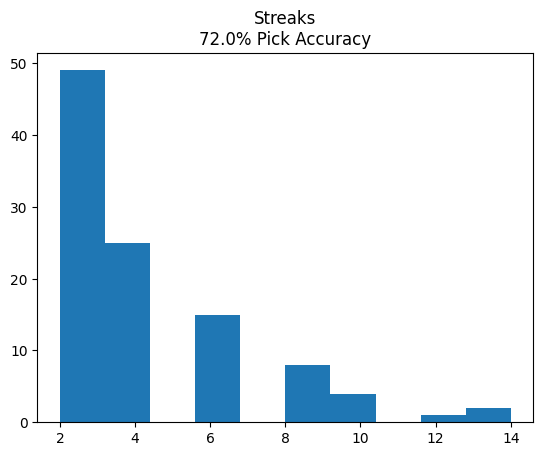

In [19]:
import matplotlib.pyplot as plt

top_two_picks_by_day_df = df[df['hit_prob'] > 0.7].sort_values(['game_date', 'hit_prob'], ascending = [True, False]).groupby('game_date').head(2)

streak, streaks = 0, list()
for i, row in top_two_picks_by_day_df.groupby('game_date')['H'].agg(['count', 'min']).iterrows():
    result = row['count'] if row['min'] > 0 else 0
    if result == 0:
        if streak > 0:
            streaks.append(streak)
        streak = 0
    else:
        streak += result
if streak > 0:
    streaks.append(streak)

plt.hist(streaks)
plt.title(f"Streaks\n{100 * round(top_two_picks_by_day_df['H'].astype(bool).mean(), 2)}% Pick Accuracy")
plt.show()

Save Results

In [20]:
import pickle

with open('models/log_reg_scaler.pkl', 'wb') as scaler_pkl:
    pickle.dump(scaler, scaler_pkl)

with open('models/log_reg_pca.pkl', 'wb') as pca_pkl:
    pickle.dump(pca, pca_pkl)

with open('models/log_reg.pkl', 'wb') as log_reg_pkl:
    pickle.dump(clf, log_reg_pkl)